**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORTING DATASET**


In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**DATA CLEANING**

In [ ]:
# Drop column = 'id'
df.drop(columns='id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


There are null values present in 'bmi'

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Data transformation**

We replaced null values of 'bmi' with mean in that column.

In [ ]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

After checking, as you can see there are no null values present in our column.

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

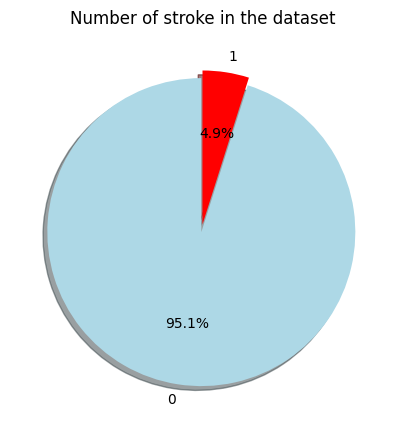

In [ ]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)

plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

**Data Visualization**

Visualizing categorical columns

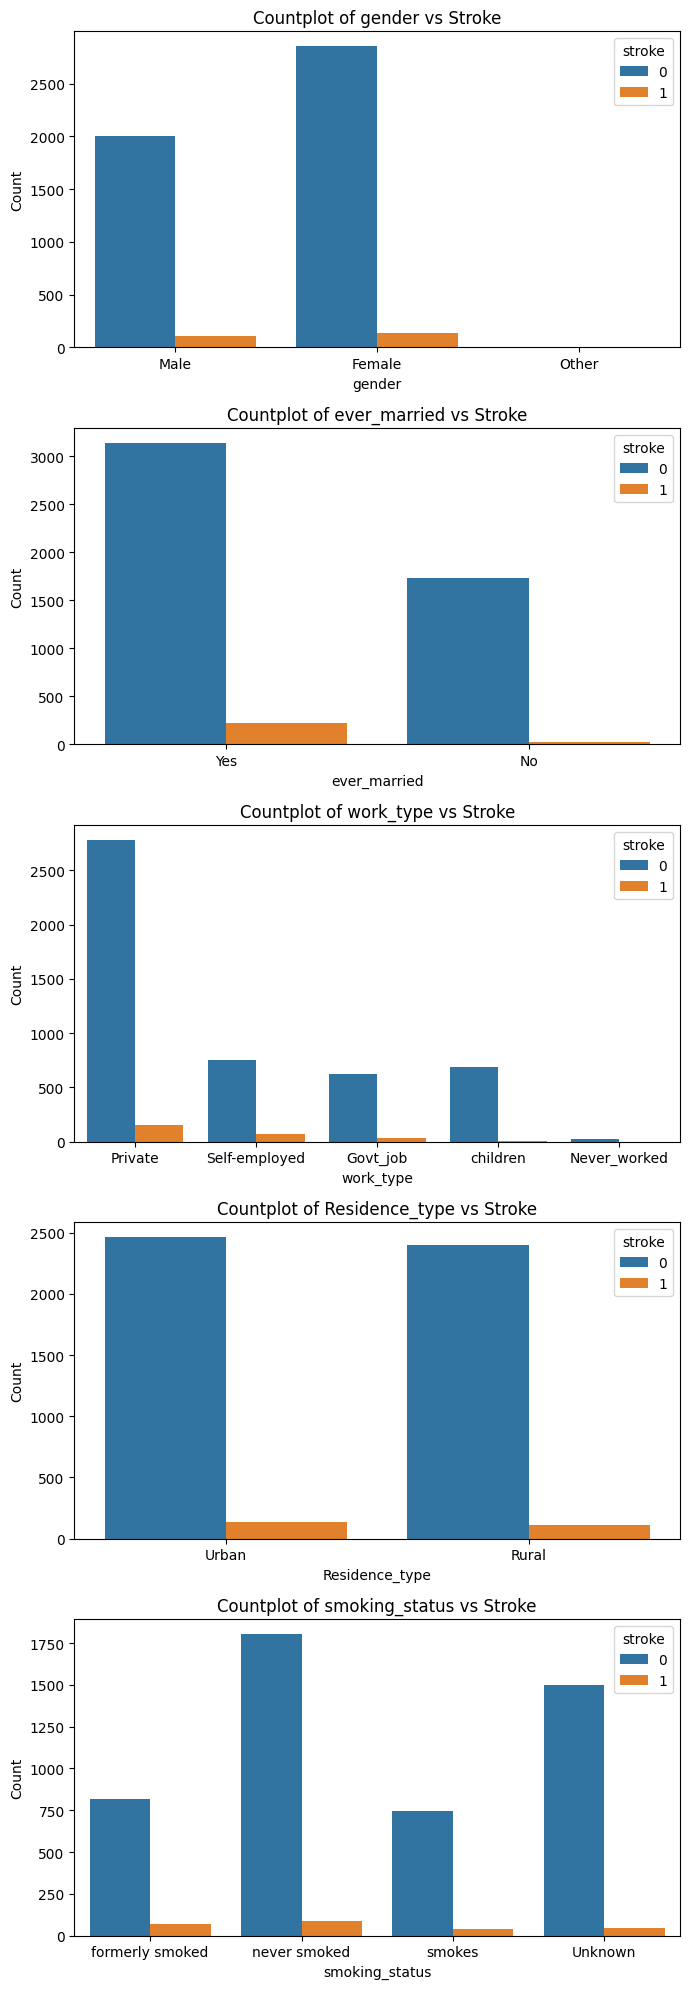

In [ ]:
# Categorical columns to visualize
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(7, 4 * len(categorical_columns)))

# Plot count plots for each categorical column
for col, ax in zip(categorical_columns, axes):
    sns.countplot(x=col, hue='stroke', data=df, ax=ax)  #Categorical columns vs stroke
    ax.set_title(f'Countplot of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


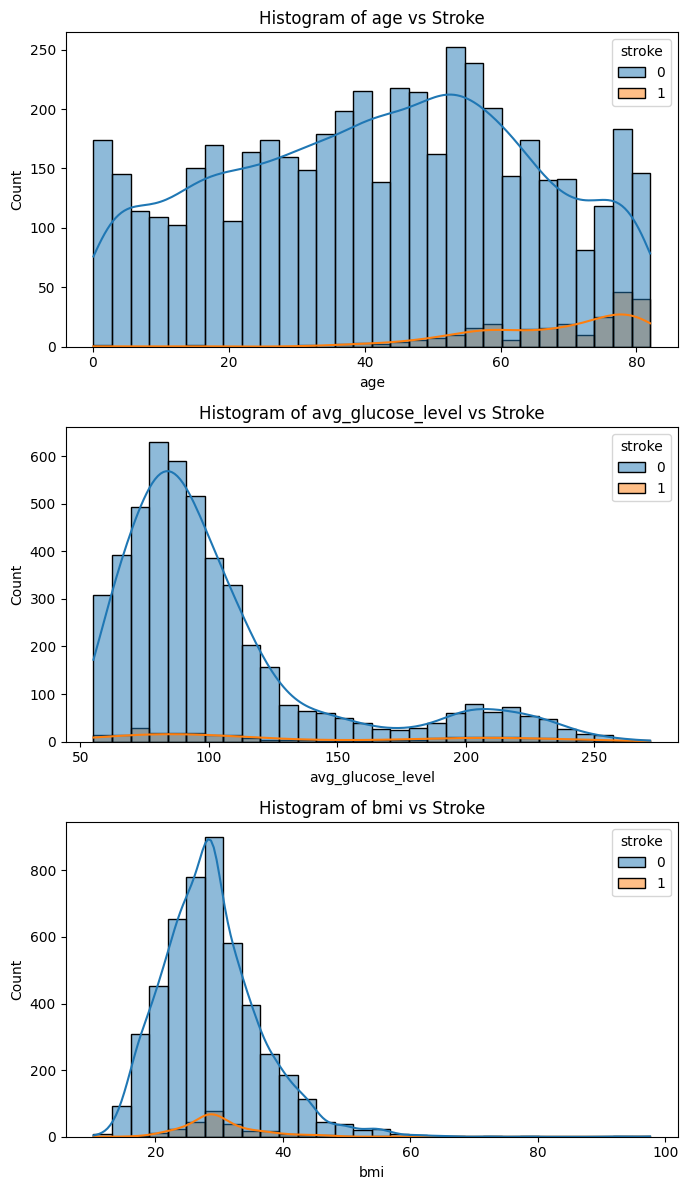

In [ ]:
# Numerical columns to visualize
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(7, 4 * len(numerical_columns)))

# Plot histograms for each numerical column
for col, ax in zip(numerical_columns, axes):
    sns.histplot(x=col, hue='stroke', data=df, kde=True, ax=ax, bins=30)
    ax.set_title(f'Histogram of {col} vs Stroke')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

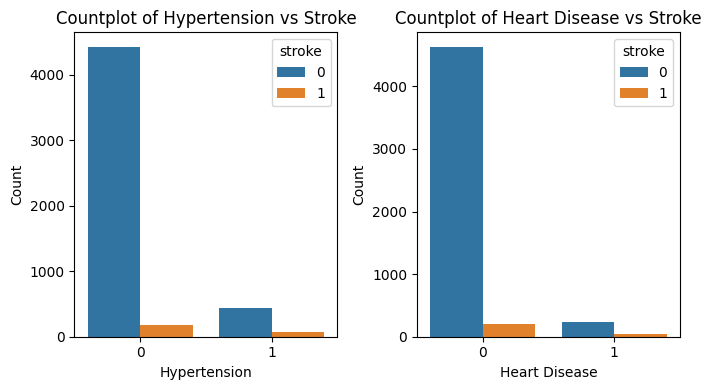

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

sns.countplot(x='hypertension', hue='stroke', data=df, ax=axes[0])
axes[0].set_title('Countplot of Hypertension vs Stroke')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

sns.countplot(x='heart_disease', hue='stroke', data=df, ax=axes[1])
axes[1].set_title('Countplot of Heart Disease vs Stroke')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Data preprocessing**

In [ ]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split the data into training and testing sets with specified test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your numerical feature sets

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test = scaler.transform(X_test)


**Logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logistic_regression = LogisticRegression()

In [ ]:
# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

**Evaluate the model**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



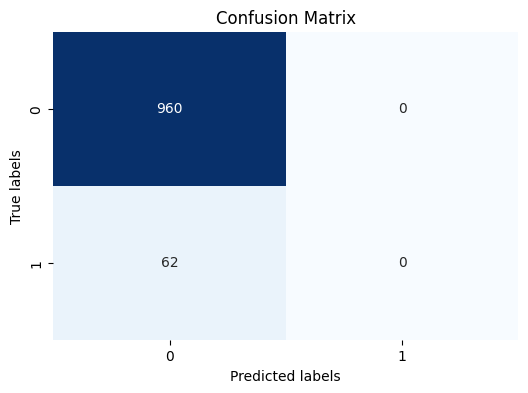

In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9393346379647749


**Oversampling using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming you have your X_train and y_train datasets defined

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Create a logistic regression model
logistic_regression = LogisticRegression()

In [ ]:
# Fit the model to the SMOTE-oversampled training data
logistic_regression.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [ ]:
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

In [ ]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       960
           1       0.17      0.79      0.28        62

    accuracy                           0.76      1022
   macro avg       0.58      0.77      0.57      1022
weighted avg       0.93      0.76      0.82      1022



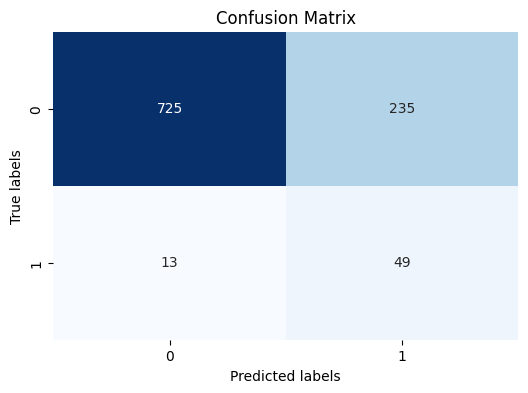

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print accuracy score
print(accuracy_score(y_test, y_pred))

0.7573385518590998


The application of SMOTE has indeed made a significant impact on the model's performance, particularly in terms of recall for the minority class (stroke = 1). Here are some key observations from the updated results

In scenarios where predicting strokes (class 1) is crucial, the improved recall for class 1 is a positive outcome.

**The performance metrics before and after applying SMOTE using bar plots for precision, recall, and F1-score for both classes**

In [ ]:
# Performance metrics before SMOTE
precision_before = [0.94, 0.0]
recall_before = [1.0, 0.0]
f1_before = [0.97, 0.0]

# Performance metrics after SMOTE
precision_after = [0.98, 0.17]
recall_after = [0.76, 0.79]
f1_after = [0.85, 0.28]

# Plotting
labels = ['Class 0 (No Stroke)', 'Class 1 (Stroke)']
width = 0.35

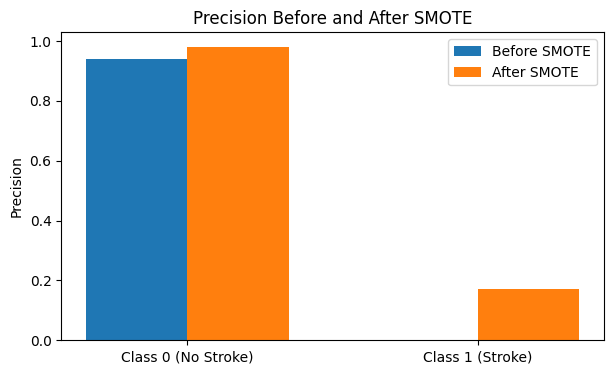

In [ ]:
# Bar plots for precision
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(np.arange(len(labels)) - width/2, precision_before, width, label='Before SMOTE')
ax.bar(np.arange(len(labels)) + width/2, precision_after, width, label='After SMOTE')

ax.set_ylabel('Precision')
ax.set_title('Precision Before and After SMOTE')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

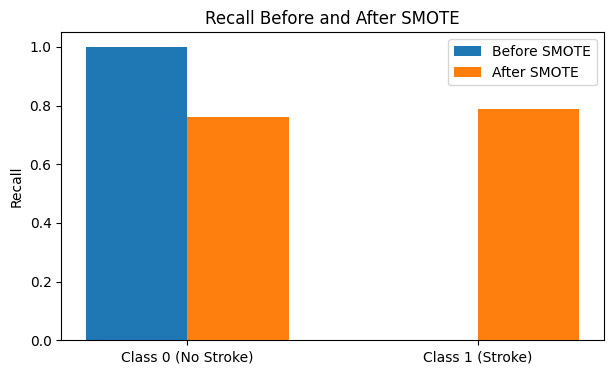

In [ ]:
# Bar plots for recall
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(np.arange(len(labels)) - width/2, recall_before, width, label='Before SMOTE')
ax.bar(np.arange(len(labels)) + width/2, recall_after, width, label='After SMOTE')

ax.set_ylabel('Recall')
ax.set_title('Recall Before and After SMOTE')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.show()

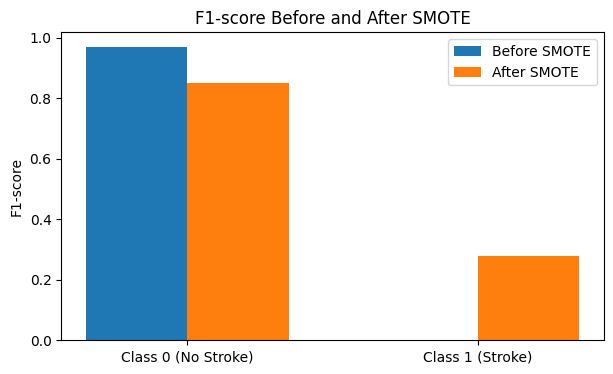

In [ ]:
# Bar plots for F1-score                           #F1-score combines precision and recall into a single score.
fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(np.arange(len(labels)) - width/2, f1_before, width, label='Before SMOTE')
ax.bar(np.arange(len(labels)) + width/2, f1_after, width, label='After SMOTE')

ax.set_ylabel('F1-score')
ax.set_title('F1-score Before and After SMOTE')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()

plt.show()

**some insights and observations from the analysis and modeling of the stroke prediction dataset:**

1.Data Overview:
The dataset contains information about individuals, including age, gender, marital status, work type, residence type, average glucose level, BMI, smoking status, and whether the person had a stroke. There was a small amount of missing data in the BMI column, and those rows were dropped during preprocessing.

2.Data Exploration:
The dataset is imbalanced, with a significantly higher number of individuals who did not have a stroke (0) compared to those who had a stroke (1). The exploration of categorical columns revealed interesting patterns, such as a higher occurrence of strokes in older individuals, those with hypertension, and those with heart disease.

3.Data Preprocessing:
Label encoding and one-hot encoding were applied to categorical columns to prepare the data for modeling. Missing values were handled by dropping rows with missing BMI values.

4.Data Visualization:
Countplots and histograms were used to visualize the distribution of stroke occurrences based on categorical and numerical features. The impact of variables like hypertension and heart disease on stroke occurrence was examined.

5.Modeling:
A logistic regression model was initially trained without addressing class imbalance, resulting in high accuracy but poor performance on predicting strokes (class 1). After applying SMOTE to oversample the minority class, the model's performance improved, especially in terms of recall for strokes.

6.Model Evaluation:
The model achieved a balanced performance, with improved recall for strokes, indicating better identification of individuals at risk. The confusion matrix and classification report provided detailed insights into the model's predictions.

7.Insights for Future Work:
Further exploration and feature engineering could enhance the model's predictive power. Consideration of additional models and hyperparameter tuning might improve performance. Continuous monitoring and updates to the model as more data becomes available could enhance its effectiveness.